In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# loading the dataset using pandas
dataset = pd.read_csv("Banknote-authentication-dataset-.csv")
dataset

,V1,V2
0,3.62160,8.66610
1,4.54590,8.16740
2,3.86600,-2.63830
3,3.45660,9.52280
4,0.32924,-4.45520
...,...,...
1367,0.40614,1.34920
1368,-1.38870,-4.87730
1369,-3.75030,-13.45860
1370,-3.56370,-8.38270


In [10]:
# calculating the mean of the dataset
dataset_mean = np.mean(dataset)
print(dataset_mean)

V1    0.433735
V2    1.922353
dtype: float64


In [11]:
# calculating standard deviation
std_dev = np.std(dataset)
std_dev

V1    2.841726
V2    5.866907
dtype: float64

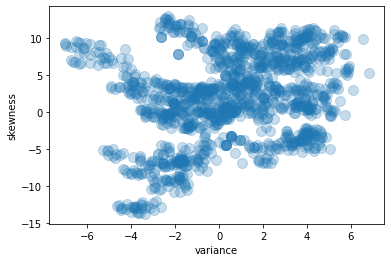

In [16]:
# Visualizing the data
plt.xlabel("variance")
plt.ylabel("skewness")

plt.scatter(dataset["V1"], dataset["V2"], s=100, alpha=0.25)
plt.show()

In [18]:
var = dataset['V1']
skew = dataset['V2']

var_skew = np.column_stack((var, skew))
var_skew

array([[  3.6216 ,   8.6661 ],
       [  4.5459 ,   8.1674 ],
       [  3.866  ,  -2.6383 ],
       ...,
       [ -3.7503 , -13.4586 ],
       [ -3.5637 ,  -8.3827 ],
       [ -2.5419 ,  -0.65804]])

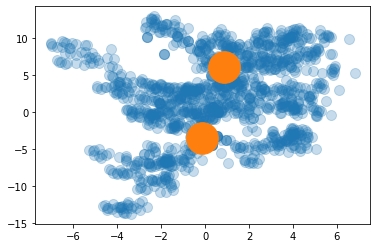

In [21]:
# running KMeans clustering on the dataset
from sklearn.cluster import KMeans

km_res = KMeans(n_clusters=2).fit(var_skew)
clusters = km_res.cluster_centers_

plt.scatter(var, skew, s=100, alpha=0.25)
plt.scatter(clusters[:,0], clusters[:,1], s=1000)